In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing a CSV file
insurance_df=pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(insurance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
#checking all the columns if there is any null value
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# making dummy variables to convert string values into binary
# dummy variable for sex
dummy1=pd.get_dummies(insurance_df['sex'])
dummy1.head()
dummy2=pd.get_dummies(insurance_df['smoker'])
dummy2.head()
dummy3=pd.get_dummies(insurance_df['region'])
dummy3.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [8]:
# concat all the dummy variavles with dataframe
insurance=pd.concat((insurance_df,dummy1,dummy2,dummy3),axis=1)

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [10]:
# drop all the columns which contains data in string format
# out of four region columns that we have got from dummy variables we need to drop one of it to avoid dummy variable trap
cols_to_use=['age','bmi','children','charges','male','yes','northeast','northwest','southeast']
insurance=insurance[cols_to_use]

In [11]:
insurance.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [12]:
#rename male by sex
insurance=insurance.rename(columns={'male':'sex'})

In [13]:
insurance.head()

,age,bmi,children,charges,sex,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [14]:
# rename yes by smoker
insurance=insurance.rename(columns={'yes':'smoker'})

In [15]:
insurance.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


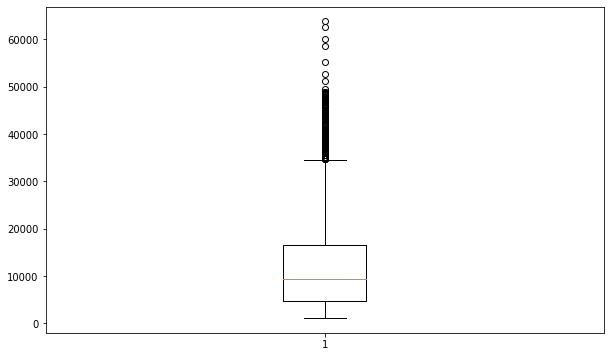

In [16]:
fig=plt.figure(figsize=(10,6))
#creating plot
plt.boxplot(insurance['charges'])
plt.show()

In [17]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [18]:
insurance.charges.std()

12110.011236694001

In [19]:
upper_limit=insurance.charges.mean()+3*insurance.charges.std()
upper_limit

49600.45597522326

In [20]:
lower_limit=insurance.charges.mean()-3*insurance.charges.std()
lower_limit

-23059.611444940747

In [21]:
insurance[(insurance.charges > upper_limit) | (insurance.charges < lower_limit)]

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
34,28,36.400,1,51194.55914,1,1,0,0,0
543,54,47.410,0,63770.42801,0,1,0,0,1
577,31,38.095,1,58571.07448,0,1,1,0,0
819,33,35.530,0,55135.40209,0,1,0,1,0
1146,60,32.800,0,52590.82939,1,1,0,0,0
1230,52,34.485,3,60021.39897,1,1,0,1,0
1300,45,30.360,0,62592.87309,1,1,0,0,1


In [22]:
insurance[(insurance.charges<upper_limit) & (insurance.charges>lower_limit)]

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1
1336,21,25.800,0,2007.94500,0,0,0,0,0


In [23]:
insurance1=insurance[(insurance.charges<upper_limit) & (insurance.charges>lower_limit)]
insurance1.shape

(1331, 9)

In [24]:
insurance.shape[0]-insurance1.shape[0]

7

In [25]:
insurance1.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [26]:
# Data Preparation
X = pd.DataFrame(np.c_[insurance1['smoker'], insurance1['bmi'], insurance1['age']], columns = ['smoker','bmi','age'])
Y = insurance1['charges']

In [27]:
# Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=56)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1064, 3)
(267, 3)
(1064,)
(267,)


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=600,max_depth=4,min_samples_leaf=3,max_features=3,verbose=2)

# Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.6s finished


RandomForestRegressor(max_depth=4, max_features=3, min_samples_leaf=3,
                      n_estimators=600, verbose=2)

In [29]:
# model evaluation for testing set
Y_train_pred=clf.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
mse = mean_squared_error(Y_train, Y_train_pred)
r2 = r2_score(Y_train, Y_train_pred)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print("\n")
print('MSE is {}'.format(mse))
print("\n")
print('R2 score is {}'.format(r2))
print("\n")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


The model performance for testing set:


RMSE is 4470.291723660864


MSE is 19983508.09463082


R2 score is 0.8538682198272601




[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished


In [30]:
# model evaluation for testing set
Y_test_pred=clf.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print("\n")
print('MSE is {}'.format(mse))
print("\n")
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set:


RMSE is 3401.6157470136036


MSE is 11570989.690330915


R2 score is 0.9153229028911631




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


Text(0, 0.5, 'y_pred')

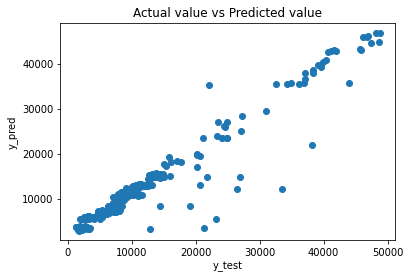

In [34]:
plt.scatter(Y_test,Y_test_pred)
plt.title("Actual value vs Predicted value")
plt.xlabel('y_test')
plt.ylabel('y_pred')